<font color='red' size='5px'/> Feature Extraction<font/>

<font color='blue' size='5px'/> Introduction<font/>

#  Overview 

Feature extraction plays a crucial role in deepfake detection as it involves extracting relevant and distinctive features from the manipulated videos that can differentiate them from real videos.

Deepfake videos are created by altering or synthesizing facial expressions, head movements, and lip movements of a target individual, which results in unnatural artifacts or inconsistencies in the video. Feature extraction techniques are designed to identify these inconsistencies and anomalies in the manipulated videos, which are often not perceptible to human eyes.

#  Literature Review

# 1 Overview

Feature extraction is an important step of any machine learning pipeline. It refers to using different algorithms and techniques to compute representations (also called features, or feature vectors) that facilitate a downstream task

## 2 Popular feature extraction techniques

## 2.1 Oriented FAST and Rotated BRIEF (ORB):

 ORB is a feature detection algorithm that is similar to SIFT and SURF but is faster and more efficient.
 
It is commonly used for:
- real-time applications such as augmented reality and robotics.

SIFT is a feature extraction technique that detects and describes local features in an image, which are invariant to scale, rotation, and illumination changes. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


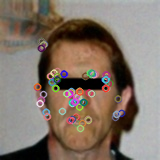

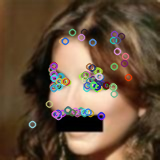

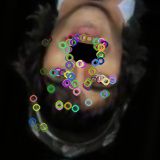

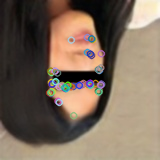

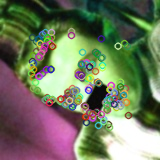

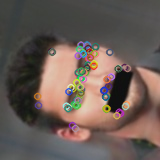

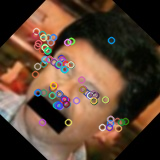

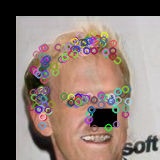

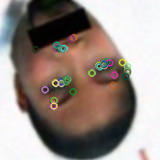

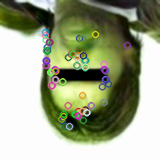

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
# Load image
DF_train_StargGAN_path='/content/drive/MyDrive/StarGAN/StarGAN_Aug_Train'+'/'
files=os.listdir(DF_train_StargGAN_path)
i=0
for file in files:
  img=cv2.imread(DF_train_StargGAN_path+f"{file}")
 
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # Initialize ORB detector
  orb = cv2.ORB_create()

  # Detect and compute keypoints and descriptors
  keypoints, descriptors = orb.detectAndCompute(gray, None)

  # Draw keypoints on image
  img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

  # Display image with keypoints
  cv2_imshow(img_with_keypoints)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  i=i+1
  if i==10:
    break

### 2.2 Speeded Up Robust Feature (SURF)

It is a feature detection algorithm that is similar to SIFT but is faster and more robust to changes in image scale and rotation. 
It is commonly used for:
- object recognition
- image stitching.

### 2.3 Harris Corner Detection:

Harris Corner Detection is a feature detection algorithm that identifies and localizes corners in an image.

It is commonly used for:
- Image registration
- Object detection,
- Tracking.

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
# Load image
DF_train_StargGAN_path='/content/drive/MyDrive/StarGAN/StarGAN_Aug_Train'+'/'
files=os.listdir(DF_train_StargGAN_path)
x=0
for file in files:
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Set parameters for Harris Corner Detection
  block_size = 2
  ksize = 3
  k = 0.04

  # Detect corners using Harris Corner Detection
  dst = cv2.cornerHarris(gray, block_size, ksize, k)

  # Normalize the result for display
  cv2.normalize(dst, dst, 0, 255, cv2.NORM_MINMAX)
  dst = cv2.convertScaleAbs(dst)

  # Draw circles around detected corners
  for i in range(dst.shape[0]):
      for j in range(dst.shape[1]):
          if dst[i,j] > 200:
              cv2.circle(img, (j,i), 3, (0,0,255), -1)

  # Display image with detected corners
  cv2_imshow(img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  x=x+1
  if x==10:
    break

### 2.4 Histogram of Oriented Gradients (HOG):

 HOG is a feature detection algorithm that calculates the distribution of gradient orientations in an image. 
 
 It is commonly used for
 - object detection,
 -  pedestrian detection,
 -  face detection.

### 2.5 Local Binary Patterns (LBP): 

LBP is a texture descriptor that can be used to extract features from images.
 
It is commonly used for:
- Face recognition,
- Texture classification,
- Image retrieval.

### 2.6 Convolutional Neural Networks (CNNs):

CNNs are a type of deep learning algorithm that can be used for feature extraction and object recognition.
 
They are commonly used for image classification, object detection, and segmentation.

## 3 DF Papers with DFDC dataset

### 3.1 An Improved Dense CNN Architecture 


The model is trained using a modified version of the DenseNet architecture, which includes dense blocks and transition layers. 
- The dense blocks have a higher number of layers and connections than in the original DenseNet architecture, allowing for more direct information flow between layers.
- The transition layers also have been modified to reduce the number of feature maps and the spatial resolution of the feature maps, thus reducing the computational cost.
- The training process uses the Adam optimizer and binary cross-entropy loss function

### 3.1.1 DenseNet 

DenseNet is a type of convolutional neural network (CNN) that was introduced in the paper "Densely Connected Convolutional Networks" by Huang et al. in 2017. The key idea behind DenseNet is to connect each layer to every subsequent layer in a feedforward manner, so that the output of each layer is concatenated with the inputs of all subsequent layers. This leads to highly dense connections between layers and facilitates feature reuse, which improves the efficiency and accuracy of the network.

The DenseNet architecture consists of several dense blocks, which are composed of several densely connected layers. Each dense block is followed by a transition layer, which reduces the spatial dimensions and the number of channels of the feature maps, and applies pooling or convolutional operations.

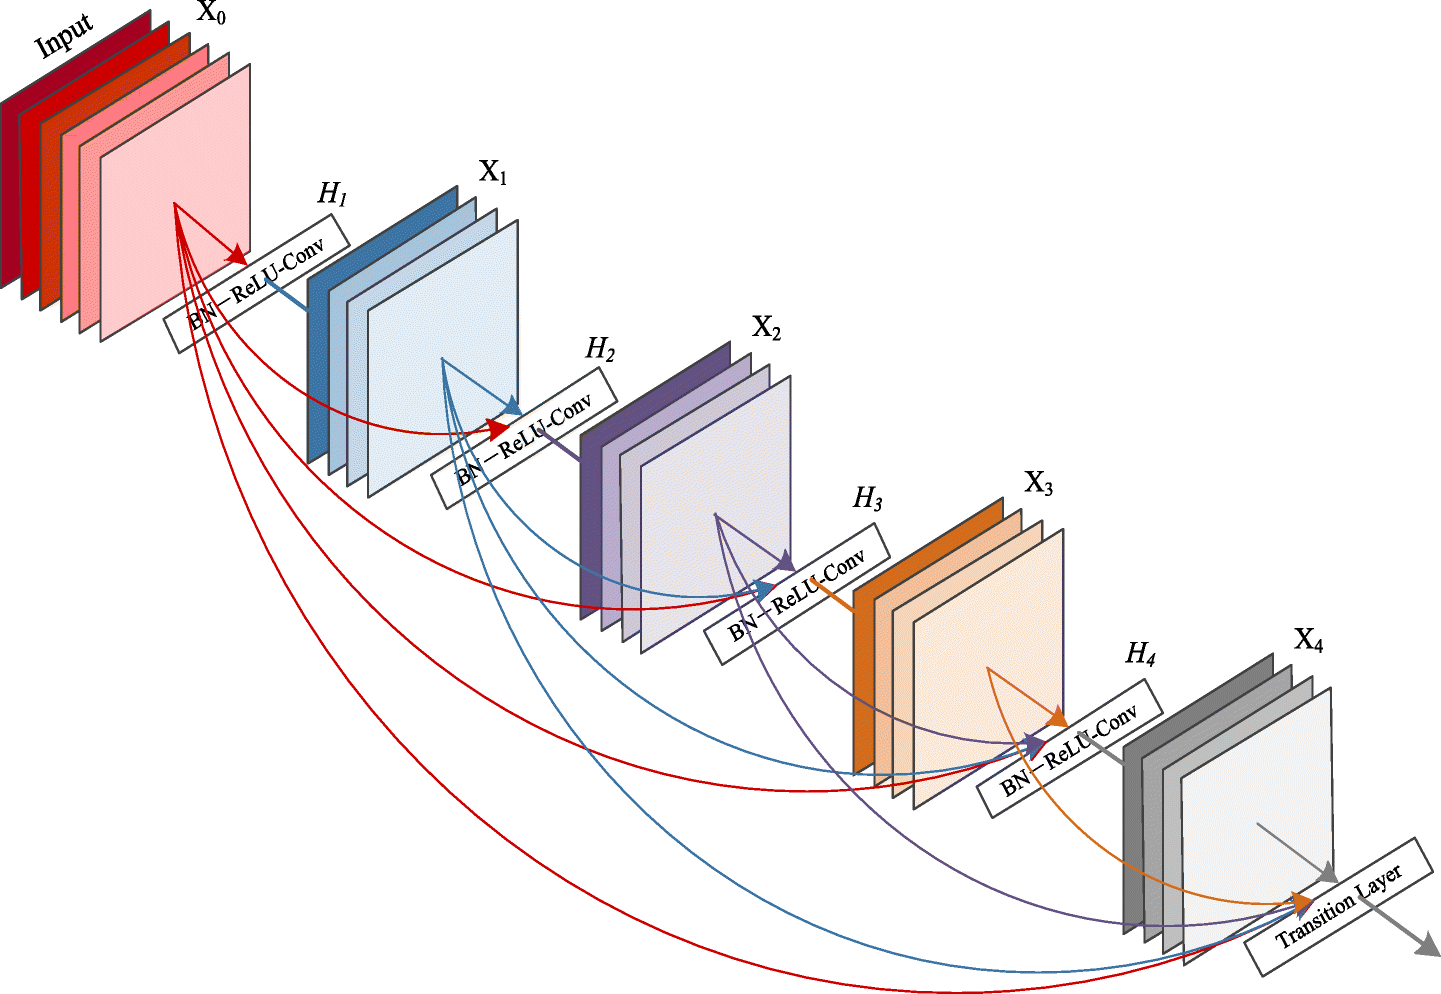

In [ ]:
from IPython.display import Image
Image('https://files.ai-pool.com/m/densenet.png')

### 3.1.2 Their Modification

These modifications aim to enhance the performance of the DenseNet architecture for deepfake image detection by increasing the depth and complexity of the network, incorporating residual learning, capturing multi-scale features, and reducing overfitting. The authors evaluate the proposed architecture on several benchmark datasets and show that it outperforms several state-of-the-art models for deepfake detection.

- Introduction of an initial convolutional layer with a larger kernel size to extract more complex features from the input image.

- Addition of a residual block at the end of each dense block, which includes a skip connection that allows the network to learn residual features.

- Introduction of a spatial pyramid pooling layer after the last dense block, which divides the feature maps into different scales and applies pooling operations to each scale to capture features at different levels of granularity.

- Addition of a dropout layer after the final dense layer to reduce overfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, AveragePooling2D, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import Input, Model

# Define the input shape
input_shape = (256, 256, 3)

# Define the number of classes (binary classification in this case)
num_classes = 2

# Define the growth rate, which determines the number of filters in each dense block
growth_rate = 32

# Define the number of dense blocks
num_dense_blocks = 4

# Define the number of layers per dense block
num_layers_per_block = 6

# Define the compression factor for transition layers
compression_factor = 0.5

# Define the input layer
inputs = Input(shape=input_shape)

# Define the initial convolution layer
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Define the initial pooling layer
x = AveragePooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Define the dense blocks
for i in range(num_dense_blocks):
    # Add a dense block
    for j in range(num_layers_per_block):
        # Define the batch normalization layer
        y = BatchNormalization()(x)
        y = Activation('relu')(y)
        # Define the convolution layer
        y = Conv2D(growth_rate, (3, 3), padding='same')(y)
        # Concatenate the output with the input
        x = Concatenate()([x, y])
    # Reduce the number of filters using a transition layer
    num_filters = int(x.shape[-1] * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(num_filters, (1, 1), padding='same')(x)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)

# Define the global average pooling layer
x = GlobalAveragePooling2D()(x)

# Define the output layer
outputs = Dense(num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3.2 The Face Deepfake Detection Challenge 
In this challenge, the top-performing methods used a combination of feature extraction techniques, including:
- Motion magnification,
- Frequency analysis,
- Convolutional neural networks.

Many of the methods also used ensemble methods, where multiple models were combined to improve overall performance.

### 3.2.1 4.1. DC-GAN (Amped Team)

The detector was based on EfficientNet,with ImageNet pre-trainedmodel.

- The model was fine-tuned with a small learning rate,
- Then the extracted features were fed to the decision module. 
- In the decision module, the extracted
features are obtained by a fully connected layer with output size 1024, and ReLU activation.
- To avoid overfitting, a dropout layer was added before the last fully connected
layer. Sigmoid activation is used to return binary classification
- Participants used the Adam optimizer, with an initial learning rate of 10^-4
- The learning rate was reduced by a factor of 0.1 if the validation loss did not decrease after five epochs.
- The last layer’s activation function is Sigmoid, while the loss function is
Binary Cross-Entropy
- The testing batch sizes were 32, 64 and 128. Classification results achieved using various version of EfficientNet (B0, B4, and B5) and various sizes of the input image patch (64, 128) were reported.

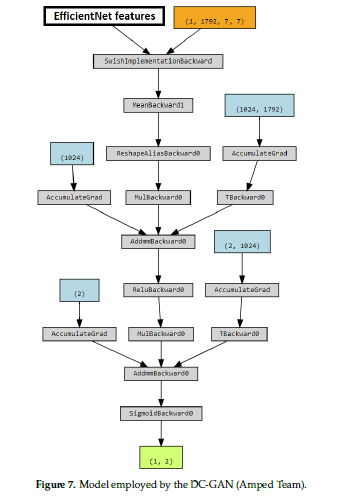

In [ ]:
Image('https://i.postimg.cc/sfLF2QRX/image.png')

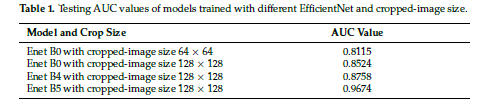

In [ ]:
Image('https://i.postimg.cc/P5s5PFkP/image.png')

### 3.2.2 Convolutional Cross Vision Transformer—AIMH Lab Team

## 4 How to select Feature Extraction Technique

<font color='blue' size='5px'/> Meeting<font/>

<font color='blue' size='5px'/> Code Implementation<font/>

# 1 Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2 Collect & Explore Data

WE used DFDC dataset

# 3 Freature Engineering

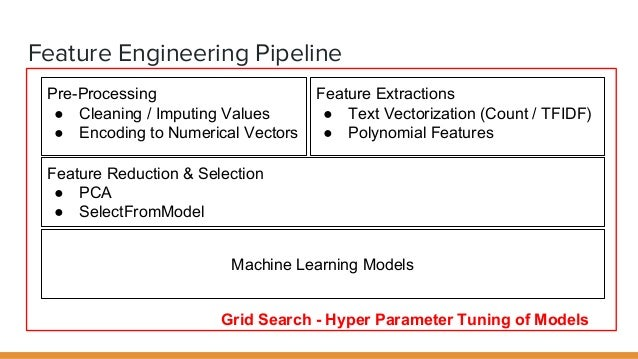

In [ ]:
from IPython.display import Image
Image('https://image.slidesharecdn.com/featureengineeringpipelines1-161106200348/95/feature-engineering-pipelines-23-638.jpg?cb=1478462927.png')

## 3.1 Preprocessing Data

## 3.1.1 Missing Data

No need

## 3.1.2 Dummy Variables

No Need

## 3.1.3 Drop Data

No Need

### 3.1.4 Augmentation


It's already have been augmented. We will just load the data

## 3.2 Feature Extraction

## 3.2.1 Feature Selection

## 3.3 Dimensionality Reduction

# 4 Preprocessing

## 4.1 Split Data

## 4.2 Scalling 

# 4 Training

# 6 Prediction

# 7 Evaluation